# 1. Facebook network

### 1. Structural properties of the facebook network

Having created the facebook network, we will study some of the structural properties of the network. To be specific, we will study  
• Connectivity  
• Degree distribution

In [1]:
if (!require("igraph")) install.packages("igraph")
library ("igraph")

Loading required package: igraph

Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
fb_graph = read.graph("facebook_combined.txt", format="edgelist", directed=FALSE)

### Question 1:

Is the facebook network connected? If not, find the giant connected component (GCC) of the network and report the size of the GCC.

In [3]:
cat("The graph has", vcount(fb_graph), "nodes\n", sep=" ")
cat("The graph has", ecount(fb_graph), "edges\n", sep=" ")

if(is.connected(fb_graph)) {
    print("The facebook network is connected")
} else {
    print("The facebook network is NOT connected")
    fb_graph.components = cluster(fb_graph)
    cat("Number of components:", fb_graph.components$csize)
    
    # which is the largest component
    ix = which.max(fb_graph.components$csize)
    # get the subgraph correspondent to just the giant component
    gcc = induced.subgraph(fb_graph, which(fb_graph.components$membership == ix))
}

The graph has 4039 nodes
The graph has 88234 edges
[1] "The facebook network is connected"
The diameter of the graph is: 8

### Question 2:

Find the diameter of the network. If the network is not connected, then find the diameter of the GCC.

In [4]:
if(is.connected(fb_graph)) {
    cat("The diameter of the graph is:", diameter(fb_graph), sep=" ")
} else {
    cat("The diameter of the GCC is:", diameter(gcc), sep=" ")
}

The diameter of the graph is: 8

### Question 3:

Plot the degree distribution of the facebook network and report the average degree.

Mean is: 43.69101 
Variance is: 2747.92 


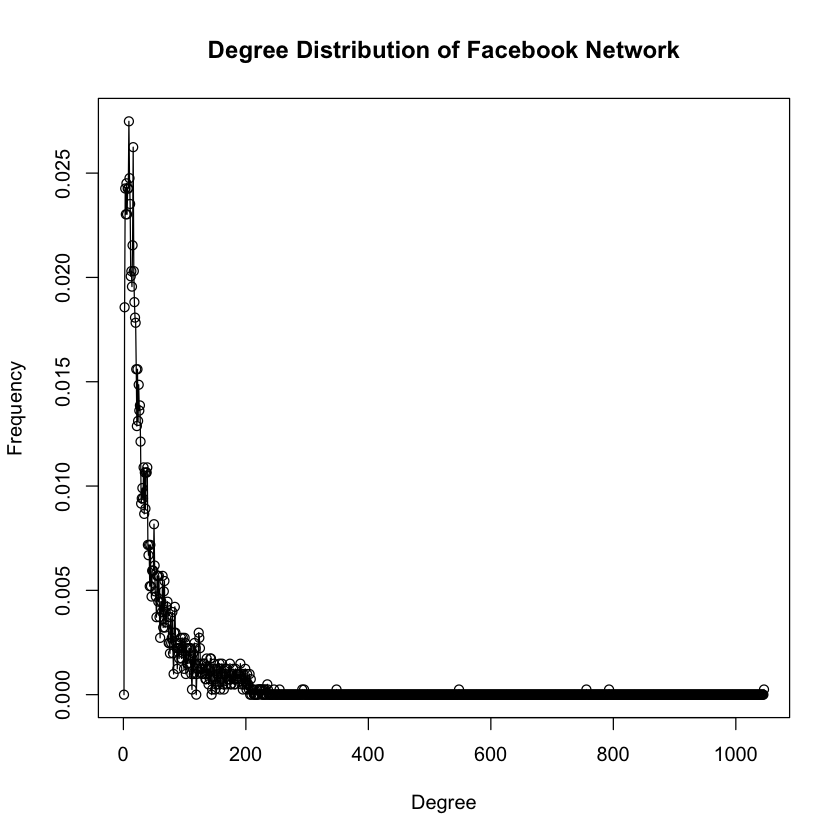

In [5]:
# show the degree distribution of fb network and report mean and variance
plot(degree_distribution(fb_graph), main = 'Degree Distribution of Facebook Network', 
     xlab = 'Degree', ylab = 'Frequency')
lines(degree_distribution(fb_graph))
cat("Mean is:", mean(degree(fb_graph)),"\n", sep=" ")
cat("Variance is:", var(degree(fb_graph)),"\n", sep=" ")

### Question 4:

Plot the degree distribution of Question 3 in a log-log scale. Try to fit a line to the plot and estimate the slope of the line.

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“819 y values <= 0 omitted from logarithmic plot”

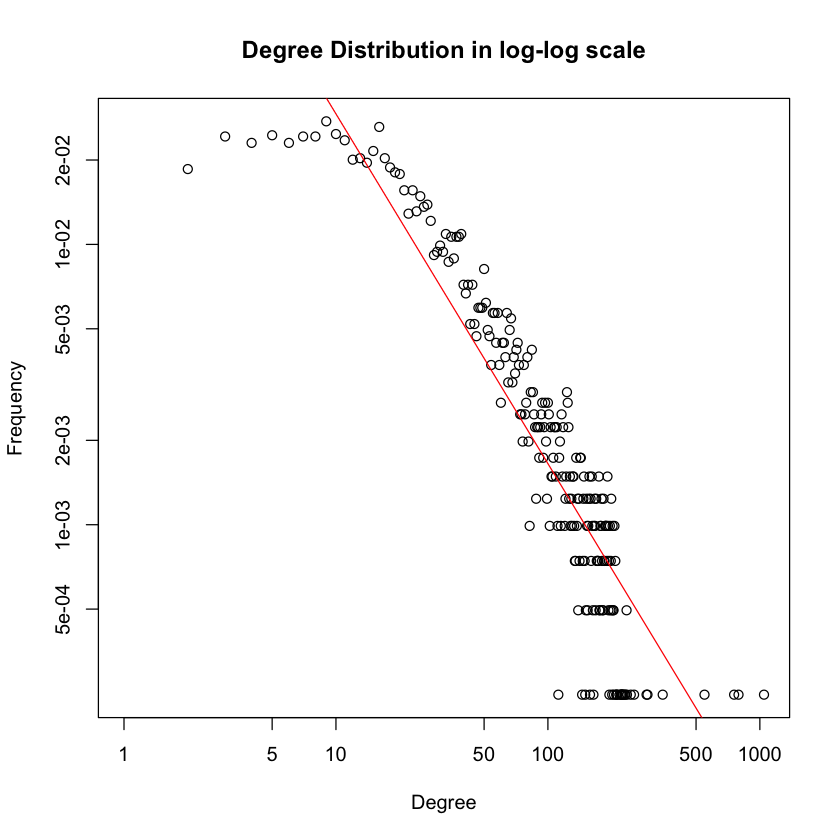

In [7]:
plot(degree_distribution(fb_graph), log = "yx",
     main = "Degree Distribution in log-log scale", xlab = "Degree", ylab = "Frequency")
line = lm(log10(degree_distribution(fb_graph)) ~ log10(1:length(degree_distribution(fb_graph))),
          subset = degree_distribution(fb_graph) > 0)
abline(line, col = "red")

In [8]:
cat("The slope of the fitted line is:", coef(line)[2])

The slope of the fitted line is: -1.247526

### 2. Personalized network

A personalized network of an user $v_i$ is defined as the subgraph induced by $v_i$ and it’s neighbors. In this part, we will study some of the structural properties of the personalized network of the user whose graph node ID is 1 (node ID in edgelist is 0). From this point onwards, whenever we are refering to a node ID we mean the graph node ID which is 1 + node ID in edgelist.

### Question 5:

Create a personalized network of the user whose ID is 1. How many nodes and edges does this personalized network have?

In [12]:
node1_subg = induced.subgraph(fb_graph, c(1, neighbors(fb_graph, 1)))
cat("The personalized network of node 1 has", vcount(node1_subg), "nodes\n", sep=" ")
cat("The personalized network of node 1 has", ecount(node1_subg), "edges\n", sep=" ")

The personalized network of node 1 has 348 nodes
The personalized network of node 1 has 2866 edges


### Question 6

What is the diameter of the personalized network? Please state a trivial upper
and lower bound for the diameter of the personalized network.

In [13]:
cat("The diameter of personalized network of node 1 is", diameter(node1_subg), "\n", sep=" ")

The diameter of personalized network of node 1 is 2 


### Question 7

In the context of the personalized network, what is the meaning of the diameter of the personalized network to be equal to the upper bound you derived in Question 6? What is the meaning of the diameter of the personalized network to be equal to the lower bound you derived in Question 6 (assuming there are more than 3 nodes in the personalized network)?

### 3. Core node's personalized network

A core node is defined as the nodes that have more than 200 neighbors. For visualization purpose, we have displayed the personalized network of a core node below. ![image](pn_example.png)In this part, we will study various properties of the personalized network of the core nodes.

### Question 8:

How many core nodes are there in the Facebook network. What is the average degree of the core nodes?

In [14]:
count = 0
dsum = 0
for(d in degree(fb_graph)) {
    if(d > 200) {
        count = count + 1
        dsum = dsum + d
    }
}
cat("There are", count, "core nodes\n", sep=" ")
cat("The average degree of the core nodes is", dsum / count, "\n", sep=" ")

There are 40 core nodes
The average degree of the core nodes is 279.375 
